<a href="https://colab.research.google.com/github/yoonyoung27/prac_python/blob/main/machine_learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/

Code  
https://github.com/rickiepark/handson-ml/

# Syllabus
http://cs229.stanford.edu/syllabus.html

\* Normal equation VS Gradient Descent

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

np.random.seed(1234)
X = 2*np.random.rand(100, 1)
y = 4+ 3*X + np.random.randn(100, 1)

In [4]:
from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # linalg : Linear algebra
theta_best

array([[4.07630632],
       [2.94132381]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)  # x가 0일 때와 2일 때의 예측값
y_predict

array([[4.07630632],
       [9.95895394]])

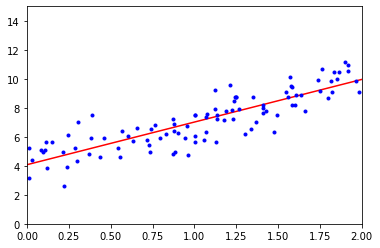

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg  = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07630632]), array([[2.94132381]]))

* lin_reg.fit(X,y)의 형식은 고정되어있다

In [9]:
lin_reg.predict(X_new)

array([[4.07630632],
       [9.95895394]])

\* Batch gradient descent

In [11]:
def cal_cost(theta, X, y):
    '''
    Calculate the cost for given X and y. The following shows and example of a single dimensional X
    theta = Vector of thetas
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(theta)
    cost = (1/2*m)*np.sum(np.square(predictions-y))
    return cost

In [12]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X     = Matrix of X with added bias units
    y     = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):

        prediction = np.dot(X,theta)

        theta = theta - (1/m)*learning_rate*(X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it] = cal_cost(theta,X,y)

    return theta, cost_history, theta_history

In [13]:
Ir = 0.01
n_iter = 1000

theta = np.random.rand(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, Ir, n_iter)

print('Theta0         : {:0.3f},\nTheta1         : {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost/MSE : {:0.3f}'.format(cost_history[-1]))

Theta0         : 3.812,
Theta1         : 3.161
Final cost/MSE : 4716.895


NameError: ignored

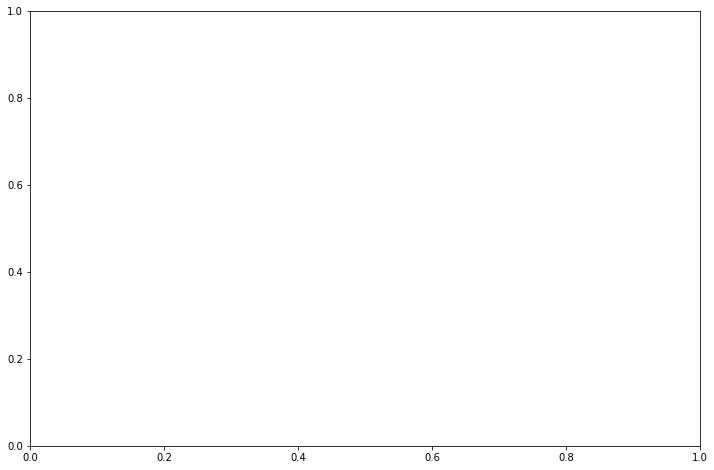

In [21]:
fig.ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlable('Iterations')
_=ax.plot(range(n_iter), cost_history, 'b.')

NameError: ignored

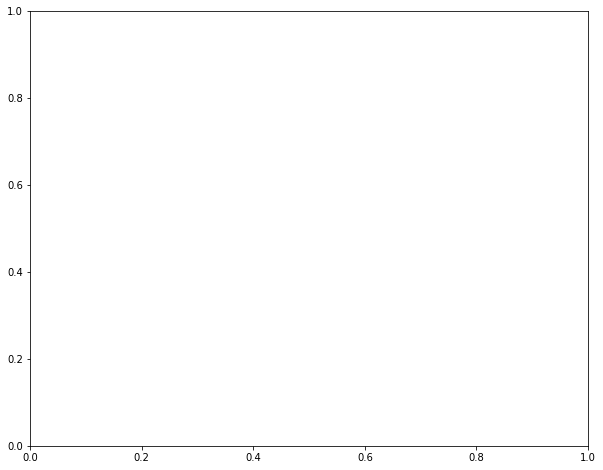

In [20]:
fig.ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200, cost_history[:200], 'b.'))

\* Stochastic Gradient Descent

In [22]:
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    '''
    X     = Matrix of X with added bias units
    y     = Vector of Y
    theta = Vector of thetas up.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no iterations
    '''
    
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, theta)

            theta = theta - (1/m)*learning_rate*(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        cost_history[it] = cost

    return theta, cost_history

In [23]:
Ir = 0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta, cost_hitory = stochastic_gradient_descent(X_b, y, theta, Ir, n_iter)

print('Theta0         : {:0.3f},\nTheta1         : {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost/MSE : {:0.3f}'.format(cost_history[-1]))

Theta0         : 4.097,
Theta1         : 3.002
Final cost/MSE : 4716.895


NameError: ignored

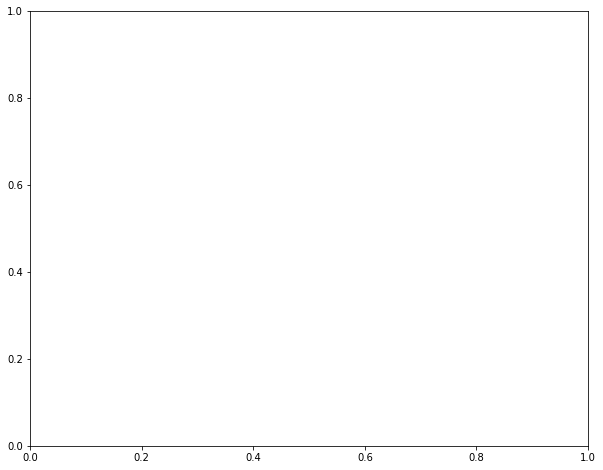

In [33]:
fig.ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}', rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter), cost_history, 'b.')

In [31]:
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X     = Matrix of X without added bias units
    y     = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permuatation(m)
        X = X[indices]
        y = y[indices]
        for i in range(interations):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            X_i = np.c_[np.ones(len(X_i)),X_i]

            prediction = np.dot(X_i, theta)

            theta = theta - (1/m)*learning_rate*(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        cost_history[it] = cost

    return theta, cost_history

In [32]:
Ir = 0.1
n_iter = 200

theta = np.random.randn(2,1)

theta, cost_hitory = stochastic_gradient_descent(X_b, y, theta, Ir, n_iter)

print('Theta0         : {:0.3f},\nTheta1         : {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost/MSE : {:0.3f}'.format(cost_history[-1]))

Theta0         : 3.980,
Theta1         : 2.987
Final cost/MSE : 4716.895


NameError: ignored

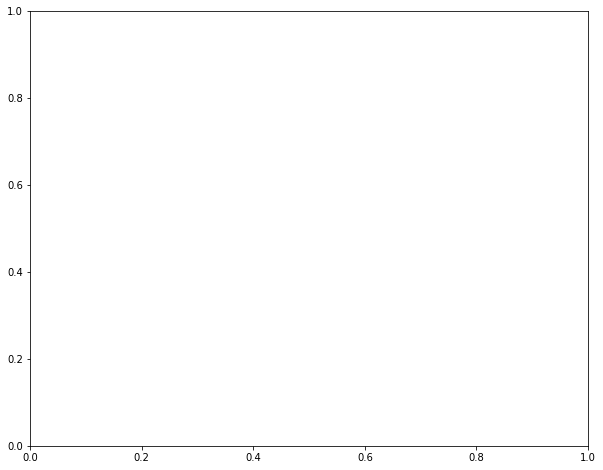

In [34]:
fig.ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}', rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter), cost_history, 'b.')